In [1]:
#Imports
import import_ipynb
from Ingestion import DataIngestion
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
class FeatureEngineer:
    def __init__(self):
        """
        Initialize the FeauterEngineer class.
        """
        pass
    def get_featured_data(self):
        self.regularData, self.tourneyData, self.ss_T1, self.ss_T2, self.seeds_T1, self.seeds_T2 = regularData, tourneyData, ss_T1, ss_T2, seeds_T1, seeds_T2
        return [self.regularData, self.tourneyData, self.ss_T1, self.ss_T2, self.seeds_T1, self.seeds_T2]

In [2]:
tourneyData = None
regularData = None

#Getting data from DataIngester
dataIngester = DataIngestion()
data = dataIngester.get_data()
menRegularResults, menTourneyResults, menSeeds, womenRegularResults, womenTourneyResults, womenSeeds = data
print("Data loaded successfully.")

# join men's and women's data into one file
regularResults = pd.concat([menRegularResults, womenRegularResults])
tourneyResults = pd.concat([menTourneyResults, womenTourneyResults])
seeds = pd.concat([menSeeds, womenSeeds])


Data loaded successfully.


In [3]:
#Data filtered for season >= 2003
season = 2003
regularResults = regularResults.loc[regularResults["Season"] >= season]
tourneyResults = tourneyResults.loc[tourneyResults["Season"] >= season]
seeds = seeds.loc[seeds["Season"] >= season]
print("Data filtered for season >= 2003.")

Data filtered for season >= 2003.


In [4]:
regularResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81703,2025,131,3471,75,3413,66,A,0,26,62,...,29,9,14,9,26,14,10,6,5,22
81704,2025,132,3192,66,3476,49,H,0,23,55,...,20,3,4,14,22,14,17,4,1,17
81705,2025,132,3250,74,3119,62,H,0,27,45,...,17,6,10,8,13,10,10,5,0,20
81706,2025,132,3293,83,3125,62,N,0,28,54,...,21,12,14,12,22,11,7,5,0,16


In [5]:
# Data preparation with adjustments for overtime and difference characteristics
def prepare_data(df):
    df = df[["Season", "DayNum", "LTeamID", "LScore", "WTeamID", "WScore", "NumOT", "LFGM", "LFGA", "LFGM3", "LFGA3", 
             "LFTM", "LFTA","LOR", "LDR", "LAst", "LTO", "LStl", "LBlk", "LPF","WFGM", "WFGA",
             "WFGM3", "WFGA3", "WFTM", "WFTA", "WOR", "WDR", "WAst", "WTO", "WStl", "WBlk", "WPF"]]
    # adjustment factor for overtimes, as more stats are accumulated during overtimes
    adjOverTime = (40 + 5 * df["NumOT"]) / 40
    adjCols = ["LScore", "WScore", "LFGM", "LFGA", "LFGM3", "LFGA3", "LFTM", "LFTA", "LOR", "LDR", "LAst", "LTO", 
               "LStl","LBlk", "LPF", "WFGM", "WFGA", "WFGM3", "WFGA3", "WFTM", "WFTA", "WOR", "WDR", "WAst", "WTO",
               "WStl", "WBlk", "WPF"]
    for col in adjCols:
        df[col] = df[col] / adjOverTime
                
    dfSwap = df.copy()
    
    # Replace W with T1_ and L with T2_ in column names
    df.columns = [x.replace("W", "T1_").replace("L", "T2_") for x in list(df.columns)]
    dfSwap.columns = [x.replace("L", "T1_").replace("W", "T2_") for x in list(dfSwap.columns)]
    output = pd.concat([df, dfSwap]).reset_index(drop=True)
    
    # Adding difference features
    output["PointDiff"] = output["T1_Score"] - output["T2_Score"]
    output["win"] = (output["PointDiff"] > 0) * 1
    output["men_women"] = (output["T1_TeamID"].apply(lambda t: str(t).startswith("1"))) * 1  # 0: women, 1: men
    return output

regularData = prepare_data(regularResults)
tourneyData = prepare_data(tourneyResults)

In [6]:
regularData

,Season,DayNum,T2_TeamID,T2_Score,T1_TeamID,T1_Score,NumOT,T2_FGM,T2_FGA,T2_FGM3,...,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,PointDiff,win,men_women
0,2003,10,1328,62.0,1104,68.0,0,22.0,53.0,2.0,...,14.0,24.0,13.0,23.0,7.0,1.0,22.0,6.0,1,1
1,2003,10,1393,63.0,1272,70.0,0,24.0,67.0,6.0,...,15.0,28.0,16.0,13.0,4.0,4.0,18.0,7.0,1,1
2,2003,11,1437,61.0,1266,73.0,0,22.0,73.0,3.0,...,17.0,26.0,15.0,10.0,5.0,2.0,25.0,12.0,1,1
3,2003,11,1457,50.0,1296,56.0,0,18.0,49.0,6.0,...,6.0,19.0,11.0,12.0,14.0,2.0,18.0,6.0,1,1
4,2003,11,1208,71.0,1400,77.0,0,24.0,62.0,6.0,...,17.0,22.0,12.0,14.0,4.0,4.0,20.0,6.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401175,2025,131,3471,75.0,3413,66.0,0,26.0,62.0,4.0,...,9.0,26.0,14.0,10.0,6.0,5.0,22.0,-9.0,0,0
401176,2025,132,3192,66.0,3476,49.0,0,23.0,55.0,3.0,...,14.0,22.0,14.0,17.0,4.0,1.0,17.0,-17.0,0,0
401177,2025,132,3250,74.0,3119,62.0,0,27.0,45.0,5.0,...,8.0,13.0,10.0,10.0,5.0,0.0,20.0,-12.0,0,0
401178,2025,132,3293,83.0,3125,62.0,0,28.0,54.0,14.0,...,12.0,22.0,11.0,7.0,5.0,0.0,16.0,-21.0,0,0


In [7]:
# extract seed number from `Seed` field
seeds["seed"] = seeds["Seed"].apply(lambda x: int(x[1:3]))

seeds

,Season,Seed,TeamID,seed
1154,2003,W01,1328,1
1155,2003,W02,1448,2
1156,2003,W03,1393,3
1157,2003,W04,1257,4
1158,2003,W05,1280,5
...,...,...,...,...
1739,2025,Z12,3193,12
1740,2025,Z13,3251,13
1741,2025,Z14,3195,14
1742,2025,Z15,3117,15


In [8]:
# adding team seeds and seed diff
seeds_T1 = seeds[["Season", "TeamID", "seed"]].copy()
seeds_T2 = seeds[["Season", "TeamID", "seed"]].copy()
seeds_T1.columns = ["Season", "T1_TeamID", "T1_seed"]
seeds_T2.columns = ["Season", "T2_TeamID", "T2_seed"]

tourneyData = tourneyData[["Season", "T1_TeamID", "T2_TeamID", "PointDiff", "win", "men_women"]]
tourneyData = pd.merge(tourneyData, seeds_T1, on=["Season", "T1_TeamID"], how="left")
tourneyData = pd.merge(tourneyData, seeds_T2, on=["Season", "T2_TeamID"], how="left")
tourneyData["Seed_diff"] = tourneyData["T2_seed"] - tourneyData["T1_seed"]
tourneyData

,Season,T1_TeamID,T2_TeamID,PointDiff,win,men_women,T1_seed,T2_seed,Seed_diff
0,2003,1421,1411,7.111111,1,1,16,16,0
1,2003,1112,1436,29.000000,1,1,1,16,15
2,2003,1113,1272,13.000000,1,1,10,7,-3
3,2003,1141,1166,6.000000,1,1,11,6,-5
4,2003,1143,1301,1.777778,1,1,8,9,1
...,...,...,...,...,...,...,...,...,...
4547,2024,3425,3163,-7.000000,0,0,1,3,2
4548,2024,3261,3234,-7.000000,0,0,3,1,-2
4549,2024,3163,3234,-2.000000,0,0,3,1,-2
4550,2024,3301,3376,-19.000000,0,0,3,1,-2


Text(0, 0.5, 'Point difference')

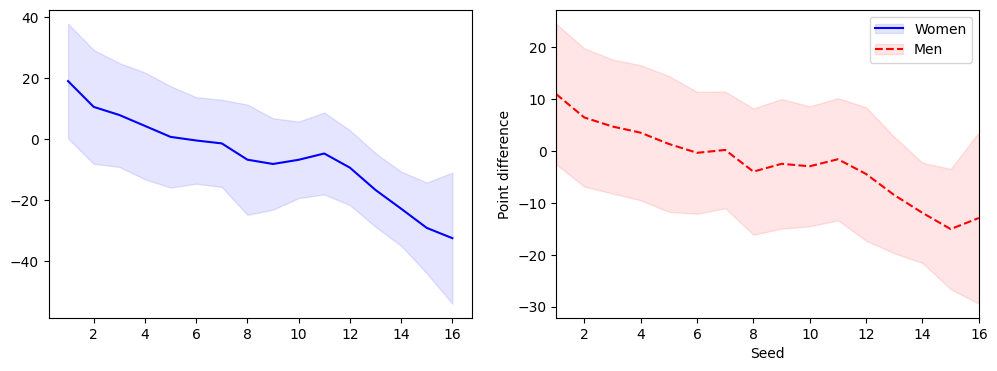

In [9]:
# let's see if __seed__ is predictive for predicting the point difference
tmpmean = tourneyData.pivot_table(columns="men_women", index="T1_seed", values="PointDiff", aggfunc="mean").ffill()
tmpstd = tourneyData.pivot_table(columns="men_women", index="T1_seed", values="PointDiff", aggfunc="std").ffill()
fig, axis = plt.subplots(ncols=2, figsize=(12, 4))
(line_1,) = axis[0].plot(tmpmean.index, tmpmean[0], "b-")
fill_1 = axis[0].fill_between(tmpmean.index, tmpmean[0] - tmpstd[0], tmpmean[0] + tmpstd[0], color="b", alpha=0.1)
(line_2,) = axis[1].plot(tmpmean.index, tmpmean[1], "r--")
fill_2 = axis[1].fill_between(tmpmean.index, tmpmean[1] - tmpstd[1], tmpmean[1] + tmpstd[1], color="r", alpha=0.1)
plt.margins(x=0)
plt.legend([(line_1, fill_1), (line_2, fill_2)], ["Women", "Men"])
plt.xlabel("Seed")
plt.ylabel("Point difference")

Text(0, 0.5, 'Point difference')

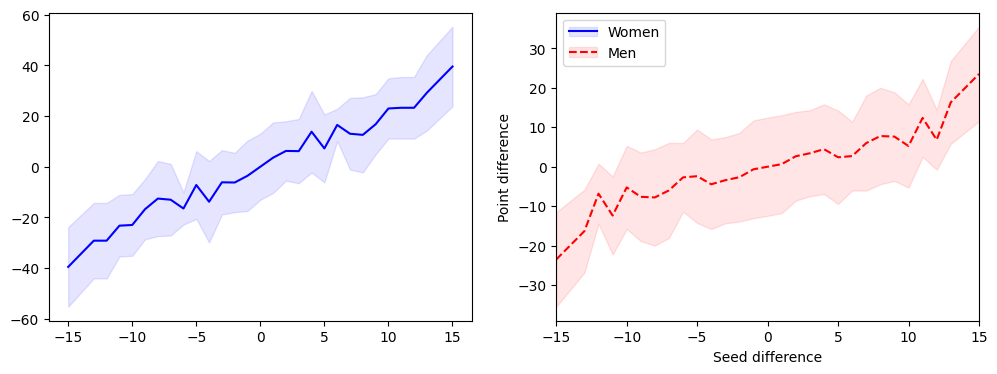

In [10]:
#let's see __seed difference__ is predictive for predicting the point difference
tmpmean = tourneyData.pivot_table(columns="men_women", index="Seed_diff", values="PointDiff", aggfunc="mean").ffill()
tmpstd = tourneyData.pivot_table(columns="men_women", index="Seed_diff", values="PointDiff", aggfunc="std").ffill()
fig, axis = plt.subplots(ncols=2, figsize=(12, 4))
(line_1,) = axis[0].plot(tmpmean.index, tmpmean[0], "b-")
fill_1 = axis[0].fill_between(tmpmean.index, tmpmean[0] - tmpstd[0], tmpmean[0] + tmpstd[0], color="b", alpha=0.1)
(line_2,) = axis[1].plot(tmpmean.index, tmpmean[1], "r--")
fill_2 = axis[1].fill_between(tmpmean.index, tmpmean[1] - tmpstd[1], tmpmean[1] + tmpstd[1], color="r", alpha=0.1)
plt.margins(x=0)
plt.legend([(line_1, fill_1), (line_2, fill_2)], ["Women", "Men"])
plt.xlabel("Seed difference")
plt.ylabel("Point difference")

In [11]:
boxcols = [
        "T1_Score", "T1_FGM", "T1_FGA", "T1_FGM3", "T1_FGA3", "T1_FTM", "T1_FTA",
        "T1_OR", "T1_DR", "T1_Ast", "T1_TO", "T1_Stl", "T1_Blk", "T1_PF",
        "T2_Score", "T2_FGM", "T2_FGA", "T2_FGM3", "T2_FGA3", "T2_FTM", "T2_FTA",
        "T2_OR", "T2_DR", "T2_Ast", "T2_TO", "T2_Stl", "T2_Blk", "T2_PF",
        "PointDiff",
    ]

In [12]:
# calculate season averages
ss = regularData.groupby(["Season", "T1_TeamID"])[boxcols].agg("mean").reset_index()
ss_T1 = ss.copy()
ss_T1.columns = ["T1_avg_" + x.replace("T1_", "").replace("T2_", "opponent_") for x in list(ss_T1.columns)]
ss_T1 = ss_T1.rename({"T1_avg_Season": "Season", "T1_avg_TeamID": "T1_TeamID"}, axis=1)
ss_T2 = ss.copy()
ss_T2.columns = ["T2_avg_" + x.replace("T1_", "").replace("T2_", "opponent_") for x in list(ss_T2.columns)]
ss_T2 = ss_T2.rename({"T2_avg_Season": "Season", "T2_avg_TeamID": "T2_TeamID"}, axis=1)

tourneyData = pd.merge(tourneyData, ss_T1, on=["Season", "T1_TeamID"], how="left")
tourneyData = pd.merge(tourneyData, ss_T2, on=["Season", "T2_TeamID"], how="left")

tourneyData

,Season,T1_TeamID,T2_TeamID,PointDiff,win,men_women,T1_seed,T2_seed,Seed_diff,T1_avg_Score,...,T2_avg_opponent_FTM,T2_avg_opponent_FTA,T2_avg_opponent_OR,T2_avg_opponent_DR,T2_avg_opponent_Ast,T2_avg_opponent_TO,T2_avg_opponent_Stl,T2_avg_opponent_Blk,T2_avg_opponent_PF,T2_avg_PointDiff
0,2003,1421,1411,7.111111,1,1,16,16,0,69.615326,...,11.914815,18.655556,11.881481,22.781481,13.718519,14.259259,7.977778,2.596296,21.533333,1.948148
1,2003,1112,1436,29.000000,1,1,1,16,15,84.511905,...,10.331034,15.482759,9.517241,21.641379,13.158621,12.910345,7.082759,3.655172,17.772414,4.689655
2,2003,1113,1272,13.000000,1,1,10,7,-3,75.344828,...,13.333333,20.659004,12.295019,23.482759,13.237548,15.019157,7.252874,3.153257,19.827586,8.693487
3,2003,1141,1166,6.000000,1,1,11,6,-5,79.344828,...,11.643098,16.619529,11.020202,21.289562,12.329966,17.006734,6.306397,2.569024,19.323232,14.898990
4,2003,1143,1301,1.777778,1,1,8,9,1,73.636015,...,15.374074,21.129630,10.514815,21.348148,12.511111,14.581481,7.418519,2.811111,19.262963,4.370370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547,2024,3425,3163,-7.000000,0,0,1,3,2,74.064516,...,8.666667,12.242424,7.484848,19.636364,11.757576,15.969697,5.212121,2.181818,16.303030,22.909091
4548,2024,3261,3234,-7.000000,0,0,3,1,-2,86.696970,...,11.050505,14.841751,8.740741,21.531987,14.087542,14.333333,7.010101,2.811448,19.114478,20.949495
4549,2024,3163,3234,-2.000000,0,0,3,1,-2,79.878788,...,11.050505,14.841751,8.740741,21.531987,14.087542,14.333333,7.010101,2.811448,19.114478,20.949495
4550,2024,3301,3376,-19.000000,0,0,3,1,-2,72.979798,...,9.593750,14.031250,9.250000,19.281250,10.062500,14.812500,6.625000,3.125000,16.812500,29.750000
